In [1]:
#loading some stuff 
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import pickle

In [2]:
#setting system path
import sys
sys.path.append('/home/tobias/data/')
base_path = '/home/tobias/data/'

In [3]:
#load average use time from database 
with open(base_path + "AvgUseTime.pkl", "rb") as input_file:
    avg_use = pickle.load(input_file)
print("Read average use time")

#load demographics data 
with open(base_path + "Demographics_Device_Data.pkl", "rb") as input_file:
    demo_data = pickle.load(input_file)
print("Read Demographics and device data")



Read average use time
Read Demographics and device data


In [30]:
#now try to merge the demographics with average use time and then clean 
HL_usetime = demo_data.merge(avg_use, on='HearingInstrumentId', how='inner').sort_values('PatientId').drop_duplicates(
    subset=['PatientId','HearingInstrumentId'])[['AvgUseTime','AudClass']]

In [164]:
HL_usetime = HL_usetime[HL_usetime['AvgUseTime'] > 0]

use_time = {}

#loop across groups
for aud, group in HL_usetime.groupby('AudClass'):
    print(aud)
    use_time[aud] = group['AvgUseTime']
    



N1
N2
N3
N4
N5
N6
N7
S1
S2
S3


In [184]:
def draw_plot(ax, data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)

    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color, alpha = 0.7)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color, alpha = 0.6) 

AttributeError: 'dict_values' object has no attribute 'bin_count'

Text(0, 0.5, 'Use time [h]')

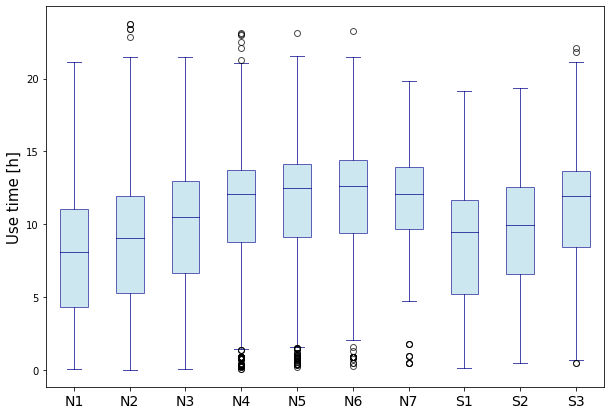

In [186]:
fig, ax = plt.subplots(figsize = (10,7))

draw_plot(ax, [use_time['N1'], use_time['N2'], use_time['N3'], use_time['N4'], use_time['N5'], use_time['N6'], use_time['N7'], use_time['S1'], use_time['S2'], use_time['S3']] , 'darkblue', 'lightblue')

ax.axes.set_xticklabels(['N1','N2','N3','N4','N5','N6','N7','S1','S2','S3'], fontsize = 14)
ax.axes.set_ylabel('Use time [h]', fontsize = 15)


In [194]:
HL_usetime.groupby('AudClass').count()


,AvgUseTime
AudClass,
N1,657
N2,3595
N3,4669
N4,1937
N5,1078
N6,482
N7,173
S1,967
S2,1168
